In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [3]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [4]:
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001E9277089B0>

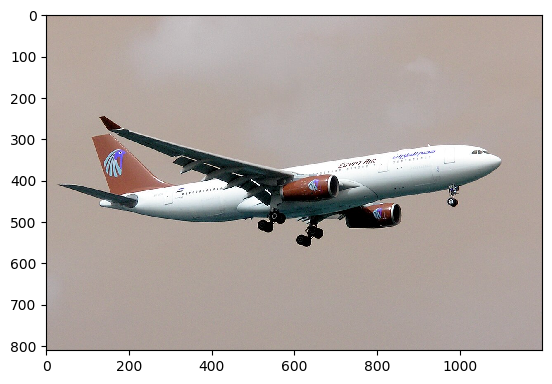

In [6]:
img = cv2.imread('areoplane.jpg')
plt.imshow(img)

In [7]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5)

In [8]:
print(ClassIndex)

[[5]]


In [9]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)

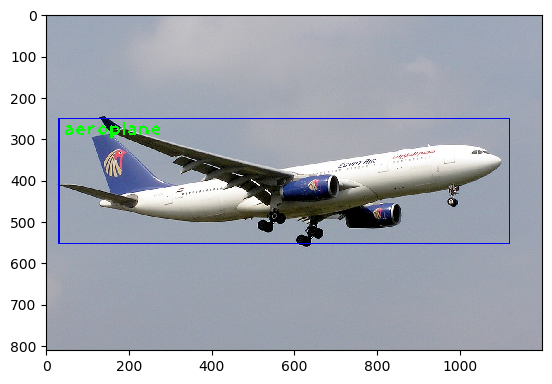

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
#video

cap = cv2.VideoCapture()
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cant open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)

    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)

            cv2.imshow('Obj detection', frame)

            if cv2.waitKey(2) & 0xff == ord('q'):
             break

cap.release()
cv2.destroyaLLWindows()

[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]

[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1

[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]


[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [31]
 [ 1]]
[[ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]]
[[1]
 [1]]
[[ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]]
[[ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]]
[[ 1]
 [31]]
[[ 1]
 [31]
 [ 1]]
[[ 1]
 [31]]
[[1]]
[[1]]
[[ 1]
 [31]]
[[ 1]
 [31]]
[[ 1]
 [31]]
[[1]]
[[ 1]
 [31]]
[[1]]
[[1]]
[[ 1]
 [31]]
[[ 1]
 [31]]
[[ 1]
 [31]
 [ 1]]
[[ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [31]]
[[1]
 [1]]
[[ 1]
 [31]
 [ 1]]
[[ 1

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

[[1]
 [1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 

[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [32]]
[[32]
 [ 1]]
[[32]
 [ 1]
 [32]]
[[1]]
[[1]]
[[1]]
[[1]]
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]


[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]]


[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [28]]
[[1]]
[[ 1]
 [28]]
[[28]
 [ 1]
 [28]]
[[28]
 [ 1]]
[[28]
 [ 1]]
[[28]
 [ 1]]
[[28]
 [ 1]]
[[28]
 [ 1]]
[[28]
 [ 1]]
[[28]
 [ 1]]
[[28]
 [ 1]]
[[ 1]
 [28]]
[[1]]
[[ 1]
 [28]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[1]]
[[ 1]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]


[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [44]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1

[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1

[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1

[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[

[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[90]
 [90]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
